In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/student_spending (1).csv')

In [ ]:
print(df.head())

   Unnamed: 0  age      gender year_in_school             major  \
0           0   19  Non-binary       Freshman        Psychology   
1           1   24      Female         Junior         Economics   
2           2   24  Non-binary         Junior         Economics   
3           3   23      Female         Senior  Computer Science   
4           4   20      Female         Senior  Computer Science   

   monthly_income  financial_aid  tuition  housing  food  transportation  \
0             958            270     5939      709   296             123   
1            1006            875     4908      557   365              85   
2             734            928     3051      666   220             137   
3             617            265     4935      652   289             114   
4             810            522     3887      825   372             168   

   books_supplies  entertainment  personal_care  technology  health_wellness  \
0             188             41             78         134 

In [ ]:
print(df.describe())

        Unnamed: 0          age  monthly_income  financial_aid      tuition  \
count  1000.000000  1000.000000     1000.000000    1000.000000  1000.000000   
mean    499.500000    21.675000     1020.650000     504.771000  4520.395000   
std     288.819436     2.322664      293.841161     287.092575   860.657944   
min       0.000000    18.000000      501.000000       0.000000  3003.000000   
25%     249.750000    20.000000      770.750000     261.000000  3779.750000   
50%     499.500000    22.000000     1021.000000     513.000000  4547.500000   
75%     749.250000    24.000000     1288.250000     751.500000  5285.000000   
max     999.000000    25.000000     1500.000000    1000.000000  6000.000000   

          housing         food  transportation  books_supplies  entertainment  \
count  1000.00000  1000.000000      1000.00000     1000.000000    1000.000000   
mean    696.00600   252.642000       124.63700      174.761000      84.814000   
std     171.21862    86.949606        43.5579

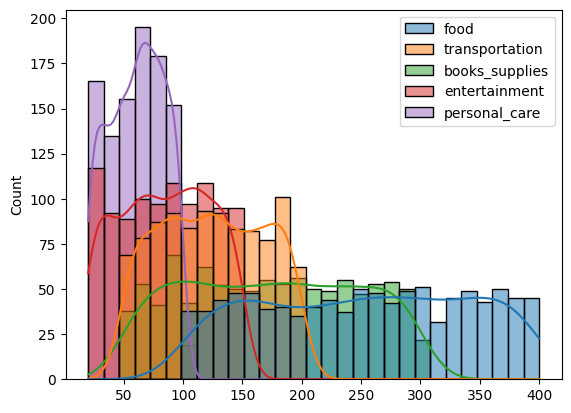

In [ ]:
sns.histplot(data=df[['food', 'transportation', 'books_supplies', 'entertainment','personal_care']], kde=True)
plt.show()

In [ ]:
features = ['food', 'entertainment', 'books_supplies', 'health_wellness']
X = df[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
df['kmeans_labels'] = kmeans.fit_predict(X_scaled)
sil_k = silhouette_score(X_scaled, df['kmeans_labels'])
print(f"K‑Means silhouette score (k={k}):", sil_k)

K‑Means silhouette score (k=3): 0.17657596218103486


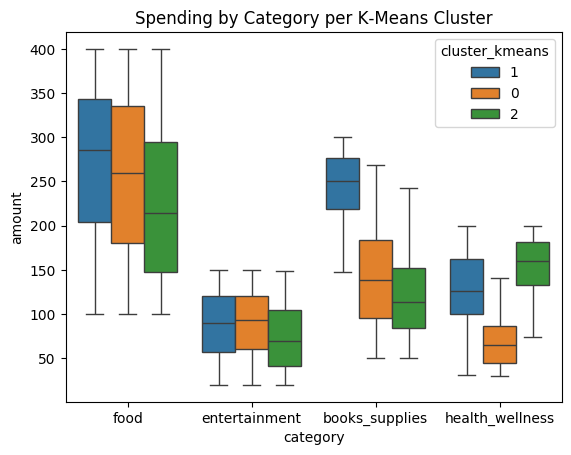

In [ ]:
df['cluster_kmeans'] = df['kmeans_labels'].astype(str)
melt = df.melt(id_vars='cluster_kmeans', value_vars=features,
               var_name='category', value_name='amount')
sns.boxplot(x='category', y='amount', hue='cluster_kmeans', data=melt)
plt.title('Spending by Category per K‑Means Cluster')
plt.show()

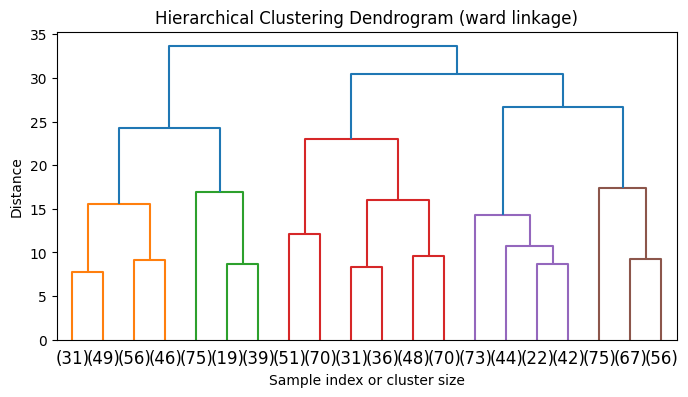

In [ ]:
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(8, 4))
dendrogram(linked, truncate_mode='lastp', p=20)
plt.title('Hierarchical Clustering Dendrogram (ward linkage)')
plt.xlabel('Sample index or cluster size')
plt.ylabel('Distance')
plt.show()

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering
hclust = AgglomerativeClustering(n_clusters=k, linkage='ward')
df['h_labels'] = hclust.fit_predict(X_scaled)

In [ ]:
sil_h = silhouette_score(X_scaled, df['h_labels'])
print(f"Hierarchical silhouette score (k={k}):", sil_h)

Hierarchical silhouette score (k=3): 0.14136837695625717


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
coords = pca.fit_transform(X_scaled)
df['pc1'], df['pc2'] = coords[:,0], coords[:,1]

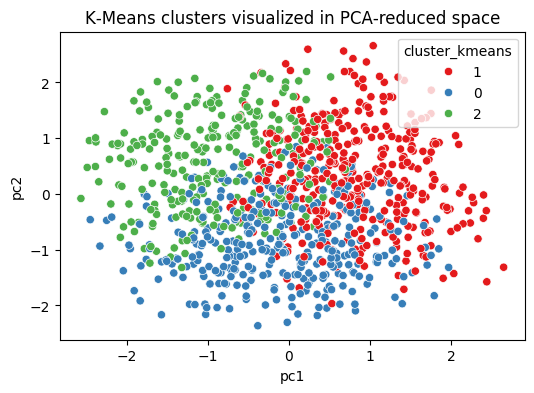

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pc1', y='pc2', hue='cluster_kmeans', data=df, palette='Set1')
plt.title('K‑Means clusters visualized in PCA‑reduced space')
plt.show()

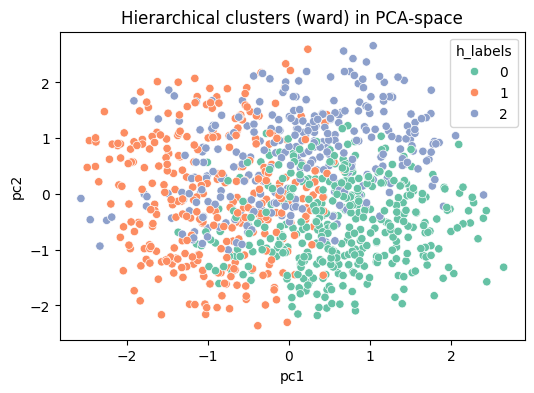

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='pc1', y='pc2', hue='h_labels', data=df, palette='Set2')
plt.title('Hierarchical clusters (ward) in PCA‑space')
plt.show()